In [1]:
#All libraries used have been added here
import pandas as pd
import numpy as np
import re

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

from functools import reduce

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from nltk.corpus import stopwords
nltk.download('stopwords')
import csv
import time




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joyceooi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# TWEETS BY ELON MUSK (SENTIMENT ANALYSIS) TESLA##


In [2]:
em_tweets=pd.read_csv('./datasets/elon_musk.csv')
tsla=pd.read_csv('./datasets/tesla.csv')

In [3]:
pd.set_option('display.max_columns', 3000)
pd.set_option('display.max_rows', 3000)

In [4]:
em_tweets.head(3000)

,Unnamed: 0,Datetime,Text
0,0,2020-04-16 10:08:50+00:00,Nice
1,1,2020-04-16 09:40:56+00:00,All
2,2,2020-04-16 09:15:03+00:00,Interesting
3,3,2020-04-16 09:03:43+00:00,So true
4,4,2020-04-16 08:37:51+00:00,"Not to mention Medtronic, who makes the most a..."
5,5,2020-04-16 08:20:34+00:00,I literally have the receipts!! This is so dumb.
6,6,2020-04-16 08:14:10+00:00,NaN
7,7,2020-04-16 08:13:46+00:00,NaN
8,8,2020-04-16 08:13:25+00:00,NaN
9,9,2020-04-16 07:59:24+00:00,https://twitter.com/HMHNewJersey/status/124653...


In [5]:
em_tweets.drop(columns='Unnamed: 0', inplace=True)

In [6]:
em_tweets.head(4000)

,Datetime,Text
0,2020-04-16 10:08:50+00:00,Nice
1,2020-04-16 09:40:56+00:00,All
2,2020-04-16 09:15:03+00:00,Interesting
3,2020-04-16 09:03:43+00:00,So true
4,2020-04-16 08:37:51+00:00,"Not to mention Medtronic, who makes the most a..."
...,...,...
3995,2018-11-30 07:05:43+00:00,One day
3996,2018-11-30 06:50:38+00:00,We’re doing an EIR for the greater LA tunnel n...
3997,2018-11-30 06:13:05+00:00,Update soon
3998,2018-11-29 23:18:39+00:00,Sorry


In [7]:
em_tweets.shape

(9227, 2)

In [8]:
em_tweets.isnull().sum()

Datetime     0
Text        92
dtype: int64

In [9]:
em_tweets.dropna(inplace=True)

In [10]:
em_tweets.columns = [x.lower() for x in em_tweets.columns]

In [11]:
em_tweets.dtypes

datetime    object
text        object
dtype: object

In [12]:
em_tweets[['date', 'time']] = em_tweets.datetime.str.split(' ', expand = True)


In [13]:
cols_to_drop = ['datetime','time']
em_tweets=em_tweets.drop(cols_to_drop, axis=1)

In [14]:
em_tweets.dtypes

text    object
date    object
dtype: object

In [15]:
em_tweets.head()

,text,date
0,Nice,2020-04-16
1,All,2020-04-16
2,Interesting,2020-04-16
3,So true,2020-04-16
4,"Not to mention Medtronic, who makes the most a...",2020-04-16


In [16]:
em_tweets['date'] = pd.to_datetime(em_tweets['date'])


In [17]:
em_tweets.dtypes

text            object
date    datetime64[ns]
dtype: object

In [18]:
em_tweets.sort_values(by='date', ascending=True)

,text,date
9226,"Please ignore prior tweets, as that was someon...",2010-06-04
9225,Went to Iceland on Sat to ride bumper cars on ...,2011-12-01
9224,I made the volume on the Model S http://ow.ly/...,2011-12-01
9223,"Great Voltaire quote, arguably better than Twa...",2011-12-03
9222,That was a total non sequitur btw,2011-12-03
...,...,...
29,That’s for sure!,2020-04-16
28,"SN4 won’t get flaps, so can only do flights wi...",2020-04-16
27,Production is by *far* the hard part. That’s w...,2020-04-16
25,Does seem that early use is wise. Solving late...,2020-04-16


**Separate the Headlines Column for Preprocessing**

In [19]:
em_tweets2=em_tweets[['text']].copy()

In [20]:
em_tweets2.head(1000)

,text
0,Nice
1,All
2,Interesting
3,So true
4,"Not to mention Medtronic, who makes the most a..."
5,I literally have the receipts!! This is so dumb.
9,https://twitter.com/HMHNewJersey/status/124653...
10,https://twitter.com/yourMLKCH/status/124838144...
11,https://twitter.com/jasonkreitner/status/12469...
12,.@GavinNewsom please fix this misunderstanding


### Preprocessing Using Tokenizing, Stop Words and Lemmatization/Stemming
---


**We made the decision not to tokenize or implement stopwords as this may dilute the sentiment analysis of the headlines (which are already quite brief)**

In [21]:
# for i in range(len(fb_headlines2['headline'])): #creating a function
#     words = fb_headlines2.iloc[i,0] #selecting by integer-location based indexing(where i is looping through each row and 1 refers to the index [1] position of column)
#     words = words.split() #splitting the words
#     meaningful_words = [w for w in words if not w in stopwords.words('english')]#assigning a variable to collect words which are not found in stop words.
#     print(meaningful_words)
#     cleaned_string = ' '.join(meaningful_words)#joining back the output with a space " " in between
#     fb_headlines2.iloc[i,0] = cleaned_string 

In [22]:
lemmatizer = WordNetLemmatizer() #instantiating the lemmatizer

for i in range(len(em_tweets2['text'])):#creating a function
    words = em_tweets2.iloc[i,0]
    #words = words.lower() # changing to lowercase    
    words = re.sub(r'\&\w*;', '', words) # Remove HTML special entities (e.g. &amp;)        
    words = re.sub(r'\s\s+', ' ', words) # Remove whitespace (including new line characters)        
    words = re.sub(r'https?:\/\/.*\/\w*', '', words) # Remove hyperlinks 
    list_words = words.split()
    content_lem = [lemmatizer.lemmatize(i) for i in list_words]
    cleaned_string = ' '.join(content_lem)
    em_tweets2.iloc[i,0] = cleaned_string

In [23]:
for i in em_tweets2['text']:
    print(i)
    

Nice
All
Interesting
So true
Not to mention Medtronic, who make the most advanced ventilator in the world, also affirming our help! ?s=12
I literally have the receipts!! This is so dumb.
?s=20
?s=20
?s=20
.@GavinNewsom please fix this misunderstanding
Exactly
What I find most surprising is that CNN still exists
“Dr. Levitan advocate combining breathing support from a CPAP machine or regular oxygen with comfortable positioning”. Yup.
“Don’t jump to intubation.” — Dr Caputo
A mask or nose “ventilator” with moderately increased oxygen % will help. This is common in hospitals. Intubation, where a tube is jammed down your throat under sedation & you’re fed high pressure, pure oxygen for several day to week is questionable.
Sounds about right
Roughly what is the survival rate of intubated patients? I’m hearing 10% to 20%. Is this overly pessimistic?
I know of two nurse who had their job offer revoked, one in NYC and one in Arlington
We’re working super hard on getting traffic light & stop re

This is a great idea

Um I ate most of it
Cookie decorating contest with kid
Converts about 5 million ton of mass to energy every second
Great name! Wouldn’t worry about this particular one, but a big rock will hit Earth eventually & we currently have no defense.
Don’t know yet, but it’s important that the whole world transition to sustainable energy, so we’ll make cost a low a possible
One click to order solar & save ~$500/year in utility bill with no long-term contract (cancel anytime)
Next year
With the new lower Tesla pricing, it’s like having a money printer on your roof if you live a state with high electricity costs. Still better to buy, but the rental option make the economics obvious.
Tesla Solar just relaunched. Lmk what you think …
Which mean a small corner of Texas (or anywhere) with solar panel could power the entire United States
1 Gigawatt per square kilometer of solar energy reach Earth’s surface
In a few year
Yeah, leg are hydraulic piston & abdomen is the accumulator


Tesla car price go up ~3% next week, except for $35k Model 3. Order online at http://Tesla.com before then for current prices.
Couldn’t resolve all the right issues. Will add another racing game soon.
Ok
Yeah, it might break
Software release later this week should make it better
2
True (sigh)
True
Probably right. Starship rate of progress far exceeds Falcon & Dragon, although they’re critical to getting there. dInnovation/dt is what matter long-term.
For cargo missions, propulsive land landing should be no problem. Doesn’t have same safety criticality a crew.
Pretty much any moon or planet that ha a solid or liquid surface
Most likely, but this is contingent upon NASA review & approval
Best to use a giant brake pad, aka heat shield
No
Dragon 2 wa designed to land using thrusters, with parachute a backup. Switched to chute a primary, due to difficulty of proving safety, but Dragon can still do it.

27,000 km/h
Raptor on way to Hopper. Will be mounted to vehicle next week.
NK-33 & RD 170

Rococo Basilisk is
First Falcon 9 land landing mission from Vandenberg Air Force Base in California coming up soon!
The CIO of a major pension fund is the one who deserves credit for uncovering this scam
The big fund can & will, a they’re suffering a net loss. Index manager like Blackrock pocket make excessive profit from short lending while pretending to charge low rate for “passive” index tracking.
Debatably true, if applied to individual stock selectively & consciously, but obv false if applied broadly to most of the market & without clear consent of the shareholder
Where this break down is in passive index funds, which constitute most of the market. The holder of those funds, mostly small investor & retirement funds, don’t realize that their stock are being lent to short sellers, diminishing their true equity return.
There is no rational basis for a long holder to lend their stock to shorts, a it dilutes the shareholder base & give the short a strong incentive to attack the company

Want to clarify that a individuals, the people responsible for the high cost & long timeline are almost all well-meaning, but the system of incentive is messed up
Higher safety & environmental requirement & labor cost explain only a small part of the difference. True root cause imo is an exponential growth in bureaucracy & a self-serving private sector consultant industry earning a % on project cost, incenting them to maximize cost.
And New York
And we are even worse than that in California
China’s progress in advanced infrastructure is more than 100 time faster than the US
Wow, if even Pinker doesn’t understand the difference between functional/narrow AI (eg. car) and general AI, when the latter *literally* ha a million time more compute power and an open-ended utility function, humanity is in deep trouble
End-to-end encryption encoded at firmware level. Unlikely to be hacked w current computing tech. If it is (and we learn about it), a crypto fix will go out immediately via network-w

all car
can't always detect baby and pet
Can be turned on or off. V8.1 will allow always-on min and max temp to be set.
Tesla keep temp below 40C/105F by automatically venting cabin & turning on AC when needed. Can do this for up to a year on a full charge.
My favorite new feature is the always-on max temp control for keeping kid and pet safe from overheating.
This is a major overhaul on almost every level compared to V7.
V8.0 start downloading tonight. Release will be gradual to make sure there aren't small regressions. Many car configs, many environments.
Yeah, definitely one of my favorite name
it it is
Preview of the @SpaceX interplanetary transport system at @IAC2016
that's a great one
sound like the right name for the rocket booster
That is my favorite fictional spaceship. Powered by improbability!
yeah!
Maybe Ultimate Spaceship, Version 2? Mostly because it is not the ultimate and there isn't a version 1.
I love the suggestions!
sound about right
Turns out MCT can go well beyond

Data upload from tracking plane show landing in Atlantic wa good! Several boat enroute through heavy seas.
@MarinaSBlinova Rocket boost stage reaching 0 m/s in one piece :) Will know soon. Odds not high.
Last known state for rocket boost stage is 360 m/s, Mach 1.1, 8.5 km altitude and roll rate close to zero (v important!)
Orbit insertion and Dragon deploy all good. Falcon reentry burn also good. Waiting for landing data from tracking plane.
Falcon 9-Reusable with (now retired) Grasshopper test rig in background
Hexacopter drone vid of 1st F9 rocket booster takeoff & landing w flight design leg
@erwinEmm Need to make sure precision return from hypersonic velocity work in ocean before transitioning to land
Heavy sea in Atlantic preventing our recovery ship from being on station. Maybe they can help?
This is 1st ever orbital rocket launch w landing legs. Will attempt leg deploy & soft landing out to sea.
Launch to the Space Station in just under three hour if weather hold
Honored that @N

In [24]:
em_tweets2_copy=i
pd.DataFrame(em_tweets2)
em_tweets2

,text
0,Nice
1,All
2,Interesting
3,So true
4,"Not to mention Medtronic, who make the most ad..."
...,...
9222,That wa a total non sequitur btw
9223,"Great Voltaire quote, arguably better than Twa..."
9224,I made the volume on the Model S go to 11. Now...
9225,Went to Iceland on Sat to ride bumper car on i...


In [25]:
em_tweets_date=em_tweets[['date']]

In [26]:
em_tweets[['date']]

,date
0,2020-04-16
1,2020-04-16
2,2020-04-16
3,2020-04-16
4,2020-04-16
...,...
9222,2011-12-03
9223,2011-12-03
9224,2011-12-01
9225,2011-12-01


In [27]:
em_tweets3= pd.concat([em_tweets_date, em_tweets2], axis=1, join='inner')

In [28]:
em_tweets3.shape

(9135, 2)

In [29]:
#em_tweets3.set_index('date',inplace=True)

In [30]:
em_tweets3.head()

,date,text
0,2020-04-16,Nice
1,2020-04-16,All
2,2020-04-16,Interesting
3,2020-04-16,So true
4,2020-04-16,"Not to mention Medtronic, who make the most ad..."


In [31]:
em_tweets3.sort_values(by='date', ascending=True, inplace=True)

In [32]:
em_tweets3.head()

,date,text
9226,2010-06-04,"Please ignore prior tweets, a that wa someone ..."
9225,2011-12-01,Went to Iceland on Sat to ride bumper car on i...
9224,2011-12-01,I made the volume on the Model S go to 11. Now...
9223,2011-12-03,"Great Voltaire quote, arguably better than Twa..."
9222,2011-12-03,That wa a total non sequitur btw


**The original dataset will be decomposed such that each headline contains a sentiment label, i.e. boolean whether the stock goes up or down.**

# SENTIMENT ANALYSIS USING VADAR (Valence Aware Dictionary and sEntiment Reasoner) (ELON MUSK TWEETS) 

Vadar  was constructed using human raters from Amazon Mechanical Turk. We regard it as a reliable lexicon to extract emotional or sentiment polarity

We note the limitations of Vadar for this project.Vadar is sensitive to both the polarity and the intensity of sentiments and while some may view it more suited to analyzing social media texts rather than factual headlines which tends to lack emotional intensity, emotions and acronyms, we find it sufficiently applicable to sentiment analysis in our project.

Vadar combines a dictionary of lexical features to valence scores with a set of five heuristics. 
We left in heuristics like punctuation but removed capitalization as this could inaccurately increase the intensity of positive and negative words which we felt might not be relevant for factual headlines.

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

positive sentiment : (compound score >= 0.05)
neutral sentiment : (compound score > -0.05) and (compound score < 0.05)
negative sentiment : (compound score <= -0.05)


Reference: http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf


In [33]:
!pip install vaderSentiment

In [34]:
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/joyceooi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

new_words = {
    'launch': 2.0,
    'developing': 2.0, 
    'breach': -2.4,
    'rally': 2.0,
    'selloff': -2.0,
    'roll out': 2.0,
    'hurt by':-2.0,
    'notable earnings':2.0,
    'unveils':2.0,
    'reveals':2.0,
    'raised':2.0,
    'buy': 2.0,
    'sell':-2.0,
    'up':2.0,
    'ups':2.0,
    'down':-2.0,
    'dividend':2.0,
    'acquires':2.0,
    'expansion':2.0,
    'invests':2.0,
    }
  
analyzer.lexicon.update(new_words)
    
em_tweets3['compound'] = [analyzer.polarity_scores(v)['compound'] for v in em_tweets3['text']]
em_tweets3['neg'] = [analyzer.polarity_scores(v)['neg'] for v in em_tweets3['text']]
em_tweets3['neu'] = [analyzer.polarity_scores(v)['neu'] for v in em_tweets3['text']]
em_tweets3['pos'] = [analyzer.polarity_scores(v)['pos'] for v in em_tweets3['text']]

em_tweets3.head(1000)
    


,date,text,compound,neg,neu,pos
9226,2010-06-04,"Please ignore prior tweets, a that wa someone ...",0.4939,0.113,0.586,0.302
9225,2011-12-01,Went to Iceland on Sat to ride bumper car on i...,0.8932,0.000,0.663,0.337
9224,2011-12-01,I made the volume on the Model S go to 11. Now...,0.0000,0.000,1.000,0.000
9223,2011-12-03,"Great Voltaire quote, arguably better than Twa...",0.5994,0.186,0.505,0.309
9222,2011-12-03,That wa a total non sequitur btw,0.0000,0.000,1.000,0.000
9221,2011-12-04,Am reading a great biography of Ben Franklin b...,0.7346,0.000,0.618,0.382
9219,2011-12-21,Sam Harris also wrote a nice piece on the awes...,0.6908,0.000,0.725,0.275
9214,2011-12-21,Yum! Even better than deep fried butter:,0.4926,0.000,0.653,0.347
9215,2011-12-21,"Yeah, this really is me, a my Mom @mayemusk wi...",0.0613,0.067,0.857,0.075
9220,2011-12-21,"Read ""Lying"", the new book by my friend Sam Ha...",0.7712,0.112,0.558,0.331


In [36]:
em_tweets3.dtypes


date        datetime64[ns]
text                object
compound           float64
neg                float64
neu                float64
pos                float64
dtype: object

## Tesla Headlines Average Vadar Scores By Date

In [37]:
em_tweets3_vadar=em_tweets3.groupby('date').sum()

In [38]:
em_tweets3_vadar.head(100)

,compound,neg,neu,pos
date,,,,
2010-06-04,0.4939,0.113,0.586,0.302
2011-12-01,0.8932,0.000,1.663,0.337
2011-12-03,0.5994,0.186,1.505,0.309
2011-12-04,0.7346,0.000,0.618,0.382
2011-12-21,1.6116,0.612,5.003,1.385
2011-12-22,0.4019,0.000,2.876,0.124
2011-12-24,0.7695,0.213,2.253,0.534
2011-12-26,1.6001,0.060,5.220,0.720
2011-12-27,0.7579,0.000,0.698,0.302


In [39]:
em_tweets3_vadar.to_csv('./datasets/headlines/em_tweets3_vadar.csv')

**Reanalyzing the Data**

In [40]:
em_tweets=pd.read_csv('./datasets/elon_musk.csv')

In [41]:
em_tweets_copy=em_tweets.copy()

In [42]:
em_tweets_copy.columns = [x.lower() for x in em_tweets_copy.columns]

In [43]:
em_tweets_copy

,unnamed: 0,datetime,text
0,0,2020-04-16 10:08:50+00:00,Nice
1,1,2020-04-16 09:40:56+00:00,All
2,2,2020-04-16 09:15:03+00:00,Interesting
3,3,2020-04-16 09:03:43+00:00,So true
4,4,2020-04-16 08:37:51+00:00,"Not to mention Medtronic, who makes the most a..."
...,...,...,...
9222,9222,2011-12-03 08:22:07+00:00,That was a total non sequitur btw
9223,9223,2011-12-03 08:20:28+00:00,"Great Voltaire quote, arguably better than Twa..."
9224,9224,2011-12-01 10:29:04+00:00,I made the volume on the Model S http://ow.ly/...
9225,9225,2011-12-01 09:55:11+00:00,Went to Iceland on Sat to ride bumper cars on ...


In [44]:
em_tweets_copy[['date', 'GMT']] = em_tweets_copy.datetime.str.split('+', expand = True)


In [45]:
em_tweets_copy[['date', 'time']] = em_tweets_copy.date.str.split(' ', expand = True)

In [46]:
em_tweets_copy.dropna

<bound method DataFrame.dropna of       unnamed: 0                   datetime  \
0              0  2020-04-16 10:08:50+00:00   
1              1  2020-04-16 09:40:56+00:00   
2              2  2020-04-16 09:15:03+00:00   
3              3  2020-04-16 09:03:43+00:00   
4              4  2020-04-16 08:37:51+00:00   
...          ...                        ...   
9222        9222  2011-12-03 08:22:07+00:00   
9223        9223  2011-12-03 08:20:28+00:00   
9224        9224  2011-12-01 10:29:04+00:00   
9225        9225  2011-12-01 09:55:11+00:00   
9226        9226  2010-06-04 18:31:57+00:00   

                                                   text        date    GMT  \
0                                                  Nice  2020-04-16  00:00   
1                                                   All  2020-04-16  00:00   
2                                           Interesting  2020-04-16  00:00   
3                                               So true  2020-04-16  00:00   
4     Not t

In [47]:
em_tweets_copy.head()

,unnamed: 0,datetime,text,date,GMT,time
0,0,2020-04-16 10:08:50+00:00,Nice,2020-04-16,00:00,10:08:50
1,1,2020-04-16 09:40:56+00:00,All,2020-04-16,00:00,09:40:56
2,2,2020-04-16 09:15:03+00:00,Interesting,2020-04-16,00:00,09:15:03
3,3,2020-04-16 09:03:43+00:00,So true,2020-04-16,00:00,09:03:43
4,4,2020-04-16 08:37:51+00:00,"Not to mention Medtronic, who makes the most a...",2020-04-16,00:00,08:37:51


In [48]:
cols_to_drop2 = ['unnamed: 0','datetime','GMT']
em_tweets_copy=em_tweets_copy.drop(cols_to_drop2, axis=1)

In [49]:
em_tweets_copy.head()

,text,date,time
0,Nice,2020-04-16,10:08:50
1,All,2020-04-16,09:40:56
2,Interesting,2020-04-16,09:15:03
3,So true,2020-04-16,09:03:43
4,"Not to mention Medtronic, who makes the most a...",2020-04-16,08:37:51


In [50]:
em_tweets_copy['date']=pd.to_datetime(em_tweets_copy['date'])

In [51]:
em_tweets_copy.date.dt.year.value_counts() #Tweet counts by year

2019    2932
2018    2289
2017    1161
2020     839
2016     753
2013     422
2015     328
2012     272
2014     188
2011      42
2010       1
Name: date, dtype: int64

In [52]:
em_tweets_copy.date.dt.month.value_counts() #Tweet counts by month

5     1030
4      960
6      907
3      882
7      835
12     762
2      752
10     729
1      630
9      613
8      582
11     545
Name: date, dtype: int64

In [53]:
em_tweets_copy.date.dt.weekday.value_counts() #Tweet counts by weekday

4    1522
5    1390
3    1374
6    1348
1    1238
0    1192
2    1163
Name: date, dtype: int64

In [55]:
em_tweets_copy.date.dt.day.value_counts(ascending=True) #Tweet counts by day of month

13    182
31    187
15    239
20    251
18    254
2     255
29    262
4     267
16    279
6     283
8     286
30    286
28    287
21    288
1     290
27    294
7     296
3     301
11    304
14    307
10    307
26    326
17    331
12    332
19    334
9     350
5     350
23    369
25    373
22    376
24    381
Name: date, dtype: int64

In [57]:
em_tweets_copy['Hour']=em_tweets_copy.date.dt.hour
em_tweets_copy['Day']=em_tweets_copy.date.dt.day
em_tweets_copy['Month']=em_tweets_copy.date.dt.month
em_tweets_copy['Year']=em_tweets_copy.date.dt.year

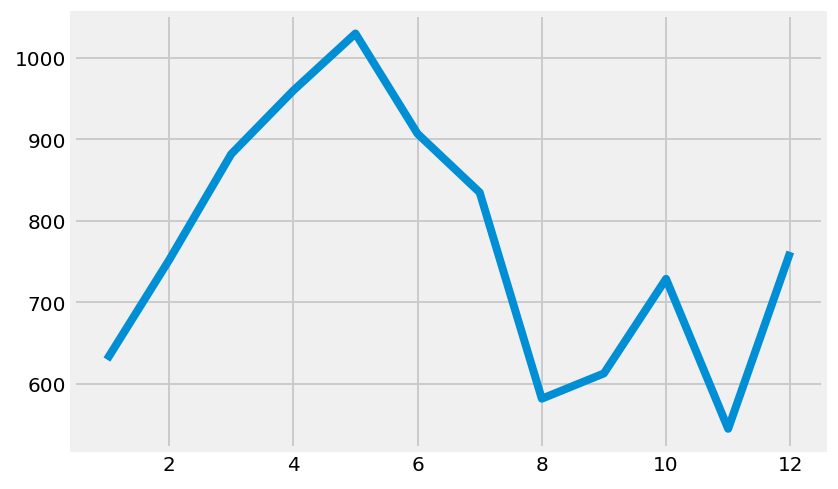

In [58]:
em_tweets_copy.Month.value_counts().sort_index().plot()

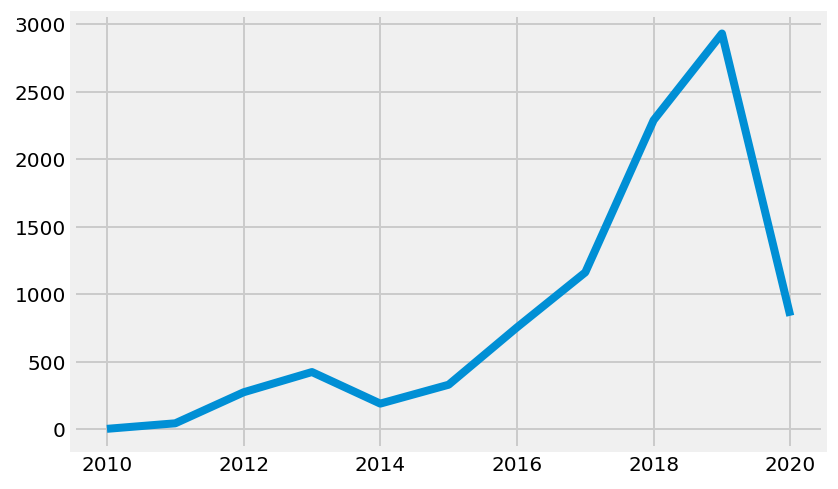

In [59]:
em_tweets_copy.Year.value_counts().sort_index().plot()

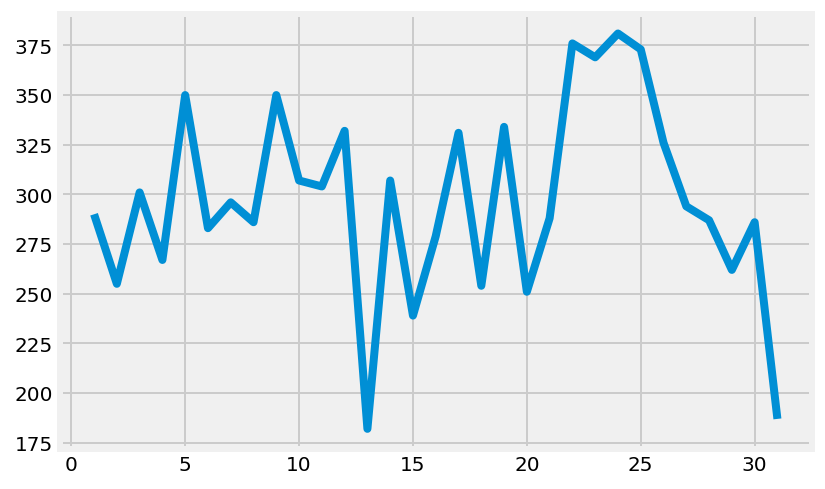

In [60]:
em_tweets_copy.Day.value_counts().sort_index().plot()

In [67]:
em_tweets_count=em_tweets_copy.groupby('date').date.count()

In [68]:
em_tweets_count.to_csv('./datasets/preprocessed/em_tweets_count.csv')

In [69]:
em_tweets_count.head()

date
2010-06-04    1
2011-12-01    2
2011-12-03    2
2011-12-04    1
2011-12-21    7
Name: date, dtype: int64

In [70]:
em_tweets_count=pd.DataFrame(em_tweets_count, columns=['date','tweet_counts_'])

In [71]:
em_tweets_count= em_tweets_count.rename(columns={'date': 'tweet_counts'})

In [75]:
em_tweets_count.head(100)

,tweet_counts
date,
2010-06-04,1
2011-12-01,2
2011-12-03,2
2011-12-04,1
2011-12-21,7
2011-12-22,3
2011-12-24,3
2011-12-26,6
2011-12-27,1


In [73]:
em_tweets_count.drop(em_tweets_count.columns[[1]], axis=1, inplace=True)


In [74]:
em_tweets_count.tail(1000)

,tweet_counts
date,
2016-10-23,2
2016-10-24,1
2016-10-26,2
2016-10-27,4
2016-10-29,6
2016-11-02,1
2016-11-03,4
2016-11-04,25
2016-11-05,7


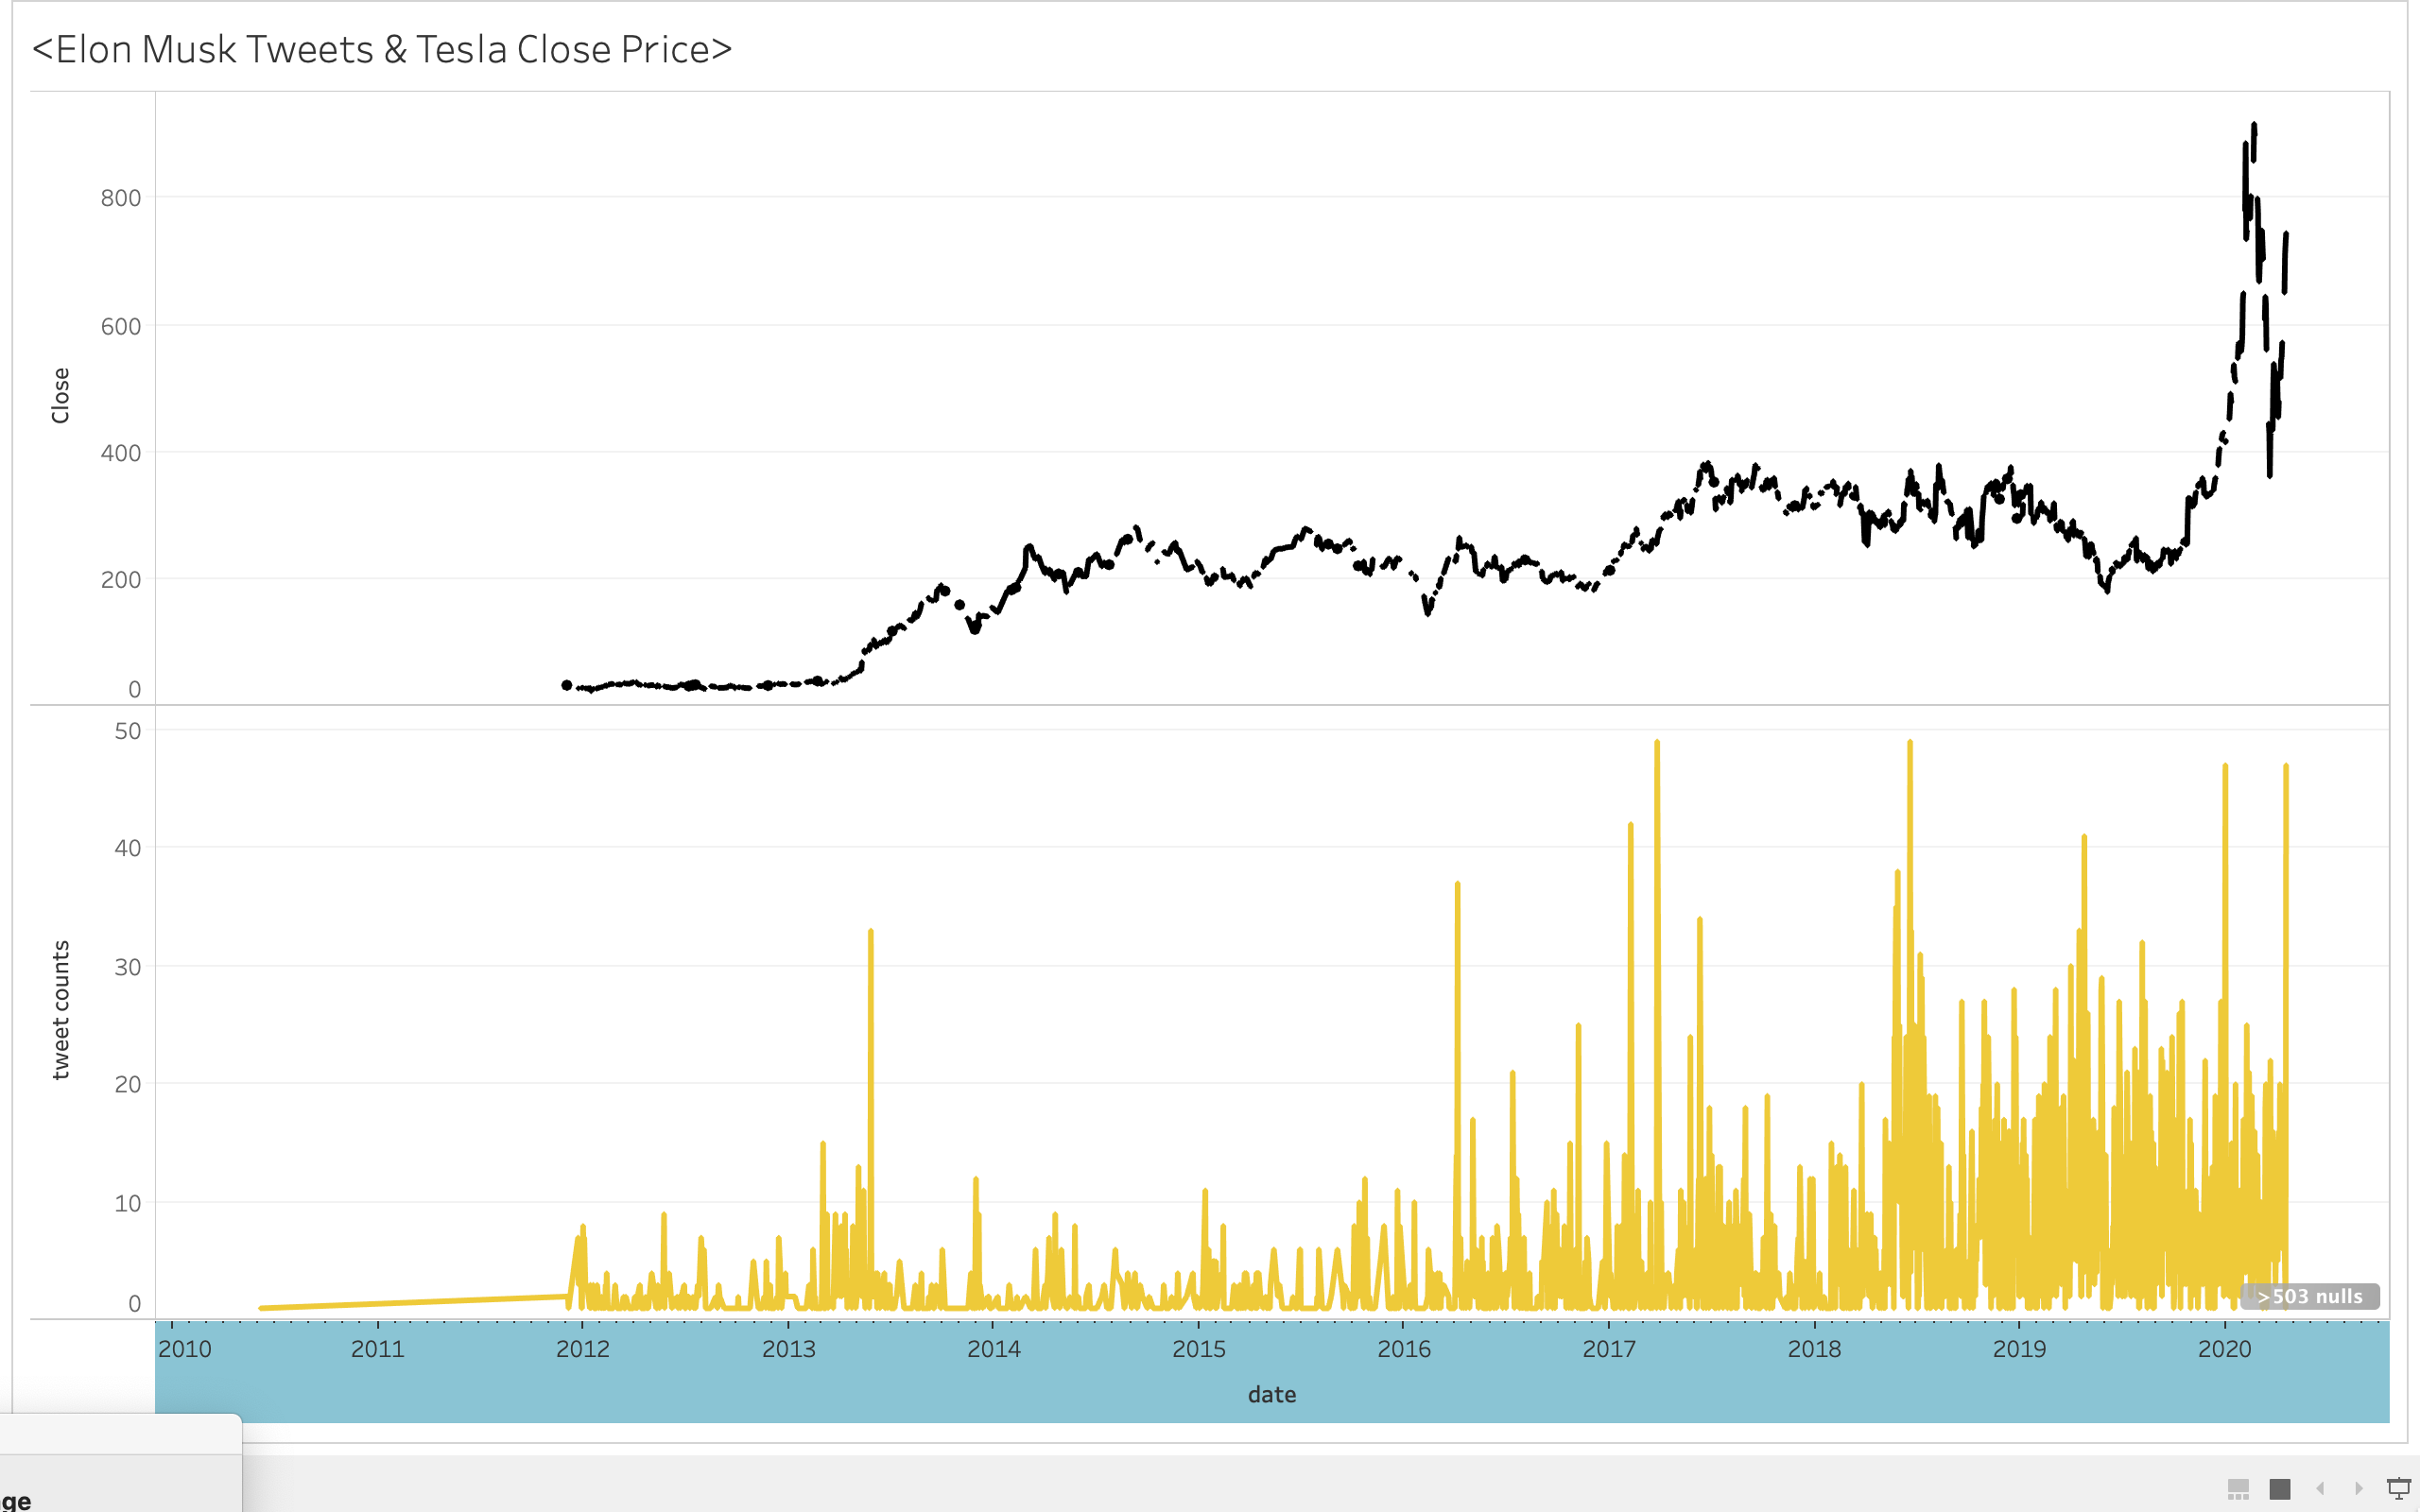


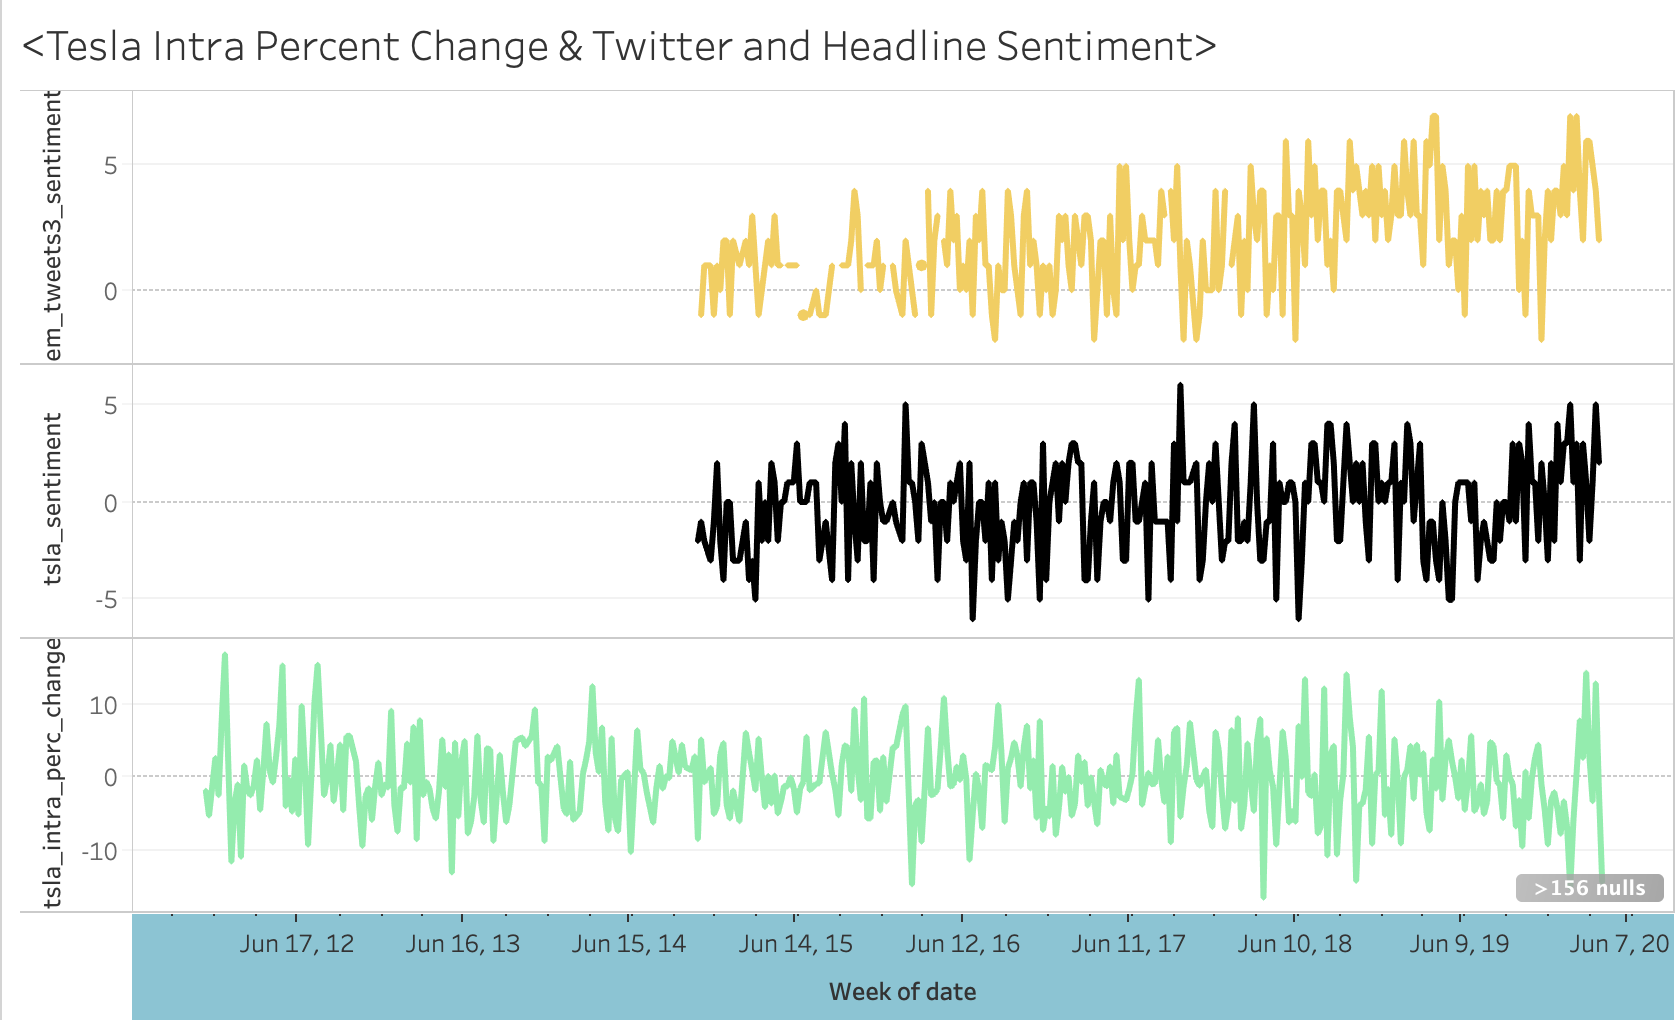